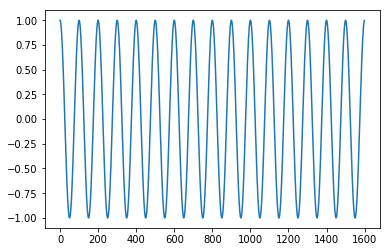

In [1]:
import numpy as np

signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

%matplotlib inline
import matplotlib.pyplot as plt

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

Using TensorFlow backend.


Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 0s 496us/step - loss: 0.1638 - val_loss: 0.0144
Epoch 2/200
760/760 [==============================] - 0s 54us/step - loss: 0.0635 - val_loss: 0.0140
Epoch 3/200
760/760 [==============================] - 0s 47us/step - loss: 0.0479 - val_loss: 0.0088
Epoch 4/200
760/760 [==============================] - 0s 49us/step - loss: 0.0444 - val_loss: 0.0107
Epoch 5/200
760/760 [==============================] - 0s 50us/step - loss: 0.0389 - val_loss: 0.0198
Epoch 6/200
760/760 [==============================] - 0s 49us/step - loss: 0.0337 - val_loss: 0.0145
Epoch 7/200
760/760 [==============================] - 0s 49us/step - loss: 0.0321 - val_loss: 0.0148
Epoch 8/200
760/760 [==============================] - 0s 50us/step - loss: 0.0309 - val_loss: 0.0104
Epoch 9/200
760/760 [==============================] - 0s 49us/step - loss: 0.0312 - val_loss: 0.0148
Epoch 10/200
760/760 [=============

Epoch 80/200
760/760 [==============================] - 0s 45us/step - loss: 0.0156 - val_loss: 0.0119
Epoch 81/200
760/760 [==============================] - 0s 45us/step - loss: 0.0167 - val_loss: 0.0100
Epoch 82/200
760/760 [==============================] - 0s 43us/step - loss: 0.0143 - val_loss: 0.0098
Epoch 83/200
760/760 [==============================] - 0s 45us/step - loss: 0.0130 - val_loss: 0.0108
Epoch 84/200
760/760 [==============================] - 0s 45us/step - loss: 0.0153 - val_loss: 0.0107
Epoch 85/200
760/760 [==============================] - 0s 45us/step - loss: 0.0143 - val_loss: 0.0086
Epoch 86/200
760/760 [==============================] - 0s 46us/step - loss: 0.0152 - val_loss: 0.0100
Epoch 87/200
760/760 [==============================] - 0s 45us/step - loss: 0.0138 - val_loss: 0.0110
Epoch 88/200
760/760 [==============================] - 0s 46us/step - loss: 0.0147 - val_loss: 0.0102
Epoch 89/200
760/760 [==============================] - 0s 46us/step - lo

Epoch 159/200
760/760 [==============================] - 0s 64us/step - loss: 0.0124 - val_loss: 0.0102
Epoch 160/200
760/760 [==============================] - 0s 71us/step - loss: 0.0132 - val_loss: 0.0094
Epoch 161/200
760/760 [==============================] - 0s 62us/step - loss: 0.0126 - val_loss: 0.0095
Epoch 162/200
760/760 [==============================] - 0s 81us/step - loss: 0.0117 - val_loss: 0.0088
Epoch 163/200
760/760 [==============================] - 0s 58us/step - loss: 0.0119 - val_loss: 0.0107
Epoch 164/200
760/760 [==============================] - 0s 55us/step - loss: 0.0116 - val_loss: 0.0109
Epoch 165/200
760/760 [==============================] - 0s 58us/step - loss: 0.0110 - val_loss: 0.0105
Epoch 166/200
760/760 [==============================] - 0s 52us/step - loss: 0.0126 - val_loss: 0.0085
Epoch 167/200
760/760 [==============================] - 0s 56us/step - loss: 0.0123 - val_loss: 0.0099
Epoch 168/200
760/760 [==============================] - 0s 56us

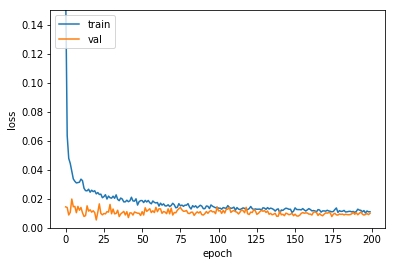

Train Score:  0.010127442281105016
Validataion Score:  0.010018174660702546
Test Score:  0.010018174660702546


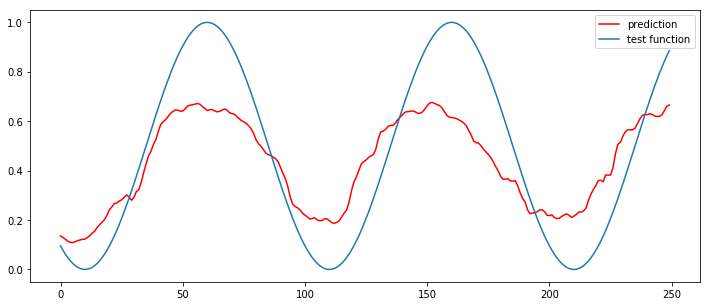

In [2]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(32,input_dim=40,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adagrad')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
          
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 1s 2ms/step - loss: 0.2260 - val_loss: 0.0399
Epoch 2/200
760/760 [==============================] - 0s 500us/step - loss: 0.0440 - val_loss: 0.0249
Epoch 3/200
760/760 [==============================] - 0s 503us/step - loss: 0.0261 - val_loss: 0.0150
Epoch 4/200
760/760 [==============================] - 0s 510us/step - loss: 0.0177 - val_loss: 0.0093
Epoch 5/200
760/760 [==============================] - 0s 499us/step - loss: 0.0148 - val_loss: 0.0044
Epoch 6/200
760/760 [==============================] - 0s 497us/step - loss: 0.0124 - val_loss: 0.0018
Epoch 7/200
760/760 [==============================] - 1s 675us/step - loss: 0.0095 - val_loss: 0.0023
Epoch 8/200
760/760 [==============================] - 1s 684us/step - loss: 0.0090 - val_loss: 0.0019
Epoch 9/200
760/760 [==============================] - 1s 664us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 10/200
760/760 [=======

Epoch 77/200
760/760 [==============================] - 0s 495us/step - loss: 0.0032 - val_loss: 8.6099e-05
Epoch 78/200
760/760 [==============================] - 0s 497us/step - loss: 0.0032 - val_loss: 2.2003e-04
Epoch 79/200
760/760 [==============================] - 0s 505us/step - loss: 0.0033 - val_loss: 1.2455e-04
Epoch 80/200
760/760 [==============================] - 0s 500us/step - loss: 0.0029 - val_loss: 9.7008e-05
Epoch 81/200
760/760 [==============================] - 0s 496us/step - loss: 0.0032 - val_loss: 1.4784e-04
Epoch 82/200
760/760 [==============================] - 0s 486us/step - loss: 0.0028 - val_loss: 2.9465e-04
Epoch 83/200
760/760 [==============================] - 0s 531us/step - loss: 0.0030 - val_loss: 4.8215e-04
Epoch 84/200
760/760 [==============================] - 0s 651us/step - loss: 0.0030 - val_loss: 1.6356e-04
Epoch 85/200
760/760 [==============================] - 1s 696us/step - loss: 0.0034 - val_loss: 5.2391e-05
Epoch 86/200
760/760 [======

760/760 [==============================] - 0s 496us/step - loss: 0.0023 - val_loss: 1.6615e-04
Epoch 153/200
760/760 [==============================] - 0s 483us/step - loss: 0.0019 - val_loss: 1.1592e-04
Epoch 154/200
760/760 [==============================] - 0s 531us/step - loss: 0.0018 - val_loss: 2.7041e-04
Epoch 155/200
760/760 [==============================] - 0s 498us/step - loss: 0.0019 - val_loss: 5.3991e-05
Epoch 156/200
760/760 [==============================] - 0s 490us/step - loss: 0.0020 - val_loss: 1.4707e-05
Epoch 157/200
760/760 [==============================] - 0s 496us/step - loss: 0.0021 - val_loss: 2.7413e-05
Epoch 158/200
760/760 [==============================] - 0s 499us/step - loss: 0.0019 - val_loss: 6.5803e-05
Epoch 159/200
760/760 [==============================] - 0s 493us/step - loss: 0.0021 - val_loss: 6.2922e-05
Epoch 160/200
760/760 [==============================] - 0s 608us/step - loss: 0.0018 - val_loss: 2.8405e-04
Epoch 161/200
760/760 [==========

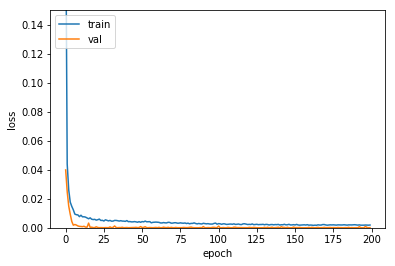

Train Score:  0.00012405297663798065
Validataion Score:  0.00012399108964018525
Test Score:  0.00012399108964018525


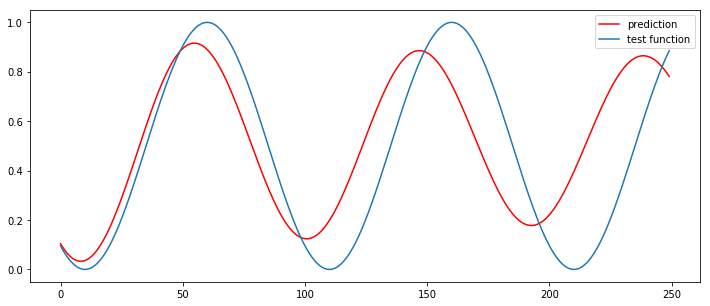

In [3]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 9s 11ms/step - loss: 0.0311 - val_loss: 0.0110
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0095 - val_loss: 7.9618e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0054 - val_loss: 1.0581e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0052 - val_loss: 0.0017
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0043 - val_loss: 5.4203e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0033 - val_loss: 0.0011
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - los

760/760 [==============================] - 8s 10ms/step - loss: 0.0021 - val_loss: 3.6310e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0022 - val_loss: 1.4404e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0021 - val_loss: 3.3387e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0019 - val_loss: 1.3606e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0022 - val_loss: 5.7275e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0021 - val_loss: 3.2148e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0022 - val_loss: 1.1214e-04
Train on 7

760/760 [==============================] - 7s 9ms/step - loss: 0.0019 - val_loss: 1.5523e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 8s 10ms/step - loss: 0.0021 - val_loss: 4.5589e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0020 - val_loss: 1.4555e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0020 - val_loss: 2.6499e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0021 - val_loss: 7.1958e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0022 - val_loss: 6.0385e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 9ms/step - loss: 0.0019 - val_loss: 1.7422e-04
Train on 

760/760 [==============================] - 8s 11ms/step - loss: 0.0021 - val_loss: 2.6944e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 8s 10ms/step - loss: 0.0020 - val_loss: 9.3209e-05
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 8s 10ms/step - loss: 0.0020 - val_loss: 3.0824e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0023 - val_loss: 1.0106e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 8s 10ms/step - loss: 0.0019 - val_loss: 1.1780e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 8s 10ms/step - loss: 0.0020 - val_loss: 1.1061e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 7s 10ms/step - loss: 0.0020 - val_loss: 3.0355e-04
Train 

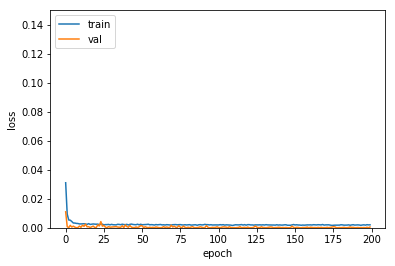

Train Score:  0.0005571677433914302
Validataion Score:  0.0005519308975932644
Test Score:  0.0005519308975932644


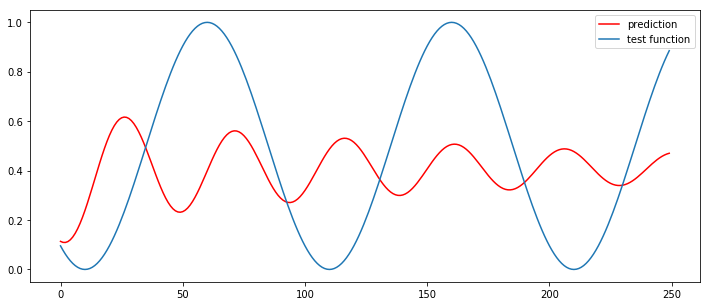

In [4]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model.reset_states()

# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 24s 31ms/step - loss: 0.0810 - val_loss: 0.0528
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 22s 29ms/step - loss: 0.0433 - val_loss: 0.0189
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0253 - val_loss: 0.0174
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0390 - val_loss: 0.1242
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 22s 29ms/step - loss: 0.0493 - val_loss: 0.0154
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 20s 27ms/step - loss: 0.0096 - val_loss: 0.0068
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 20s 27ms/step - los

760/760 [==============================] - 24s 31ms/step - loss: 0.0039 - val_loss: 0.0033
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 23s 30ms/step - loss: 0.0047 - val_loss: 0.0062
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 23s 30ms/step - loss: 0.0053 - val_loss: 0.0053
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 22s 29ms/step - loss: 0.0039 - val_loss: 0.0028
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0035 - val_loss: 0.0014
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 20s 27ms/step - loss: 0.0028 - val_loss: 0.0016
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 20s 26ms/step - loss: 0.0067 - val_loss: 0.0050
Train on 760 samples, valid

Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0029 - val_loss: 0.0012
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0027 - val_loss: 0.0020
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 27ms/step - loss: 0.0054 - val_loss: 0.0307
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 22s 29ms/step - loss: 0.0129 - val_loss: 0.0011
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0039 - val_loss: 5.4886e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 27ms/step - loss: 0.0036 - val_loss: 0.0017
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 22s 28ms/step -

760/760 [==============================] - 20s 26ms/step - loss: 0.0025 - val_loss: 0.0019
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 22s 29ms/step - loss: 0.0030 - val_loss: 0.0032
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0028 - val_loss: 0.0038
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0025 - val_loss: 2.9552e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 22s 29ms/step - loss: 0.0022 - val_loss: 5.1039e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0025 - val_loss: 0.0015
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 21s 28ms/step - loss: 0.0027 - val_loss: 8.9031e-04
Train on 760 sa

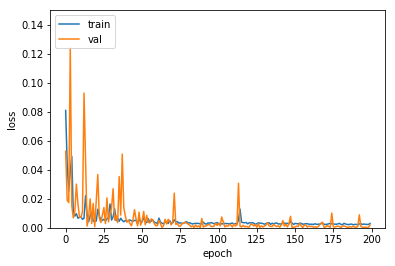

Train Score:  0.0019961619827914712
Validataion Score:  0.002008985360831477
Test Score:  0.002008985360831477


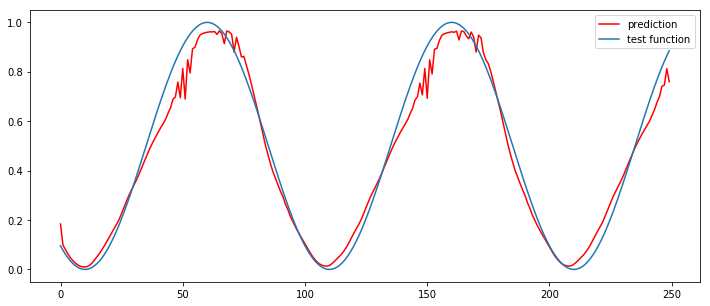

In [5]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model.reset_states()

# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()